<a href="https://colab.research.google.com/github/ProvenDruid/ANN/blob/main/exe_ANN_3groupsMultilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

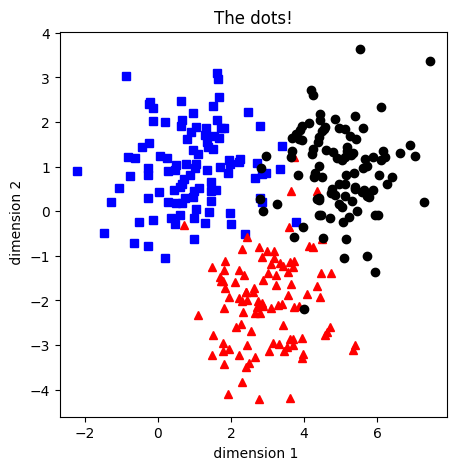

In [ ]:
# create data

nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  3, -2 ]
C = [  5,  1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels0=np.zeros((nPerClust,1))
labels1=np.ones((nPerClust,1))
labels2=np.zeros((nPerClust,1))+2

labels_np = np.vstack((labels0,labels1,labels2))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.zeros(len(data), dtype=torch.long)
#labels = torch.tensor(labels_np).float()
labels[np.where(labels_np==0)[0]] = 0
labels[np.where(labels_np==1)[0]] = 1
labels[np.where(labels_np==2)[0]] = 2

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0),0],data[np.where(labels==0),1],'bs')
plt.plot(data[np.where(labels==1),0],data[np.where(labels==1),1],'r^')
plt.plot(data[np.where(labels==2),0],data[np.where(labels==2),1],'ko')
plt.title('The dots!')
plt.xlabel(' dimension 1')
plt.ylabel(' dimension 2')
plt.show()

In [ ]:
#creating the model
# model architecture
ANN3Groups = nn.Sequential(
    nn.Linear(2,4),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(4,4),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(4,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANN3Groups.parameters(),lr=.01)


In [ ]:
yhat=ANN3Groups(data)
loss = lossfun(yhat,labels)
loss


tensor(1.2181, grad_fn=<NllLossBackward0>)

In [ ]:
yhat[0]

tensor([ 0.6686, -0.1186,  0.6693], grad_fn=<SelectBackward0>)

In [ ]:
#training the model
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANN3Groups(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANN3Groups(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

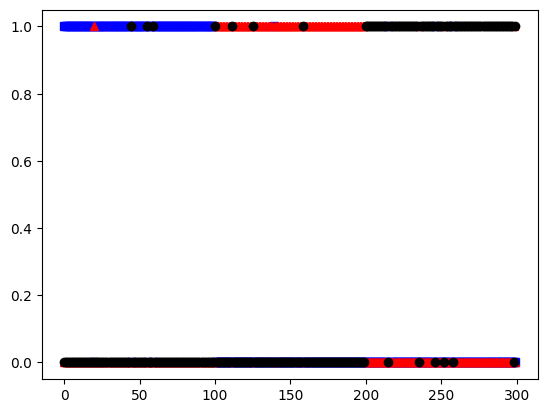

In [ ]:
plt.plot(torch.argmax(predictions,axis=1)==0,'bs')
plt.plot(torch.argmax(predictions,axis=1)==1,'r^')
plt.plot(torch.argmax(predictions,axis=1)==2,'ko')


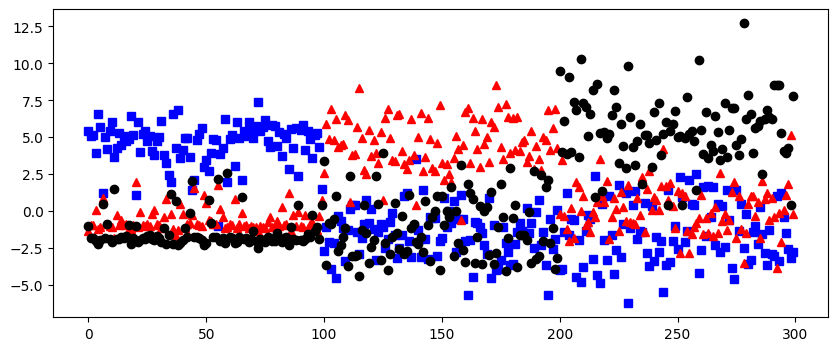

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.plot(predictions.detach()[:,0],'bs')
plt.plot(predictions.detach()[:,1],'r^')
plt.plot(predictions.detach()[:,2],'ko')

In [ ]:
predictionsSoft1=torch.nn.functional.softmax(predictions, dim=1)
predictionsSoft1;

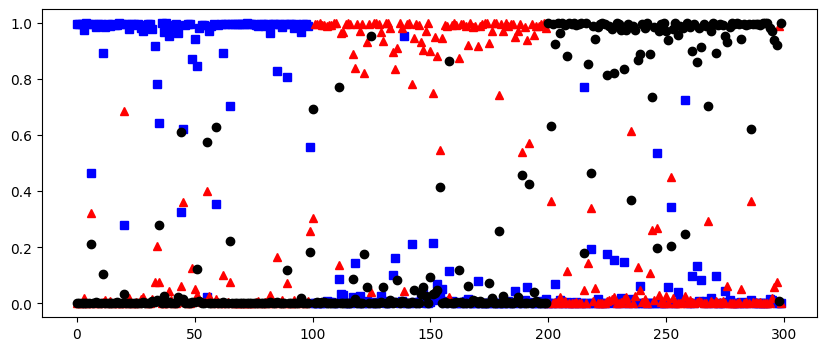

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.plot(predictionsSoft1.detach()[:,0],'bs')
plt.plot(predictionsSoft1.detach()[:,1],'r^')
plt.plot(predictionsSoft1.detach()[:,2],'ko')


Final accuracy: 95%


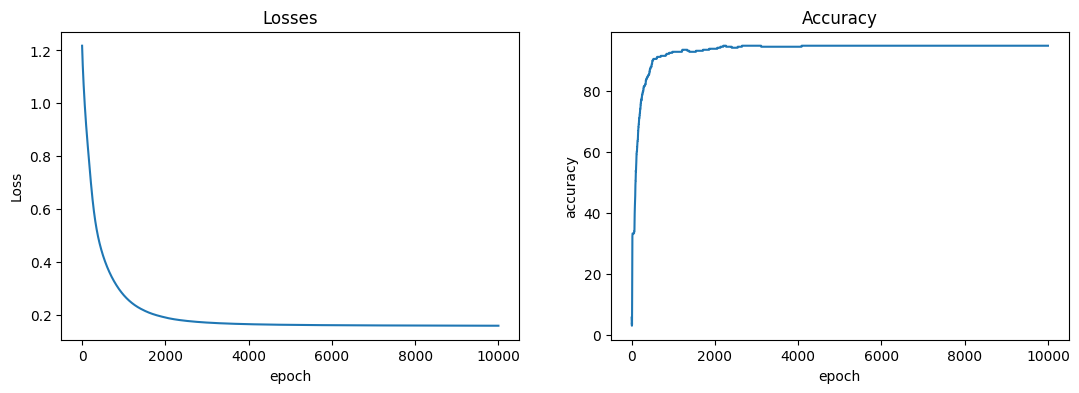

In [ ]:
#plot the results
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

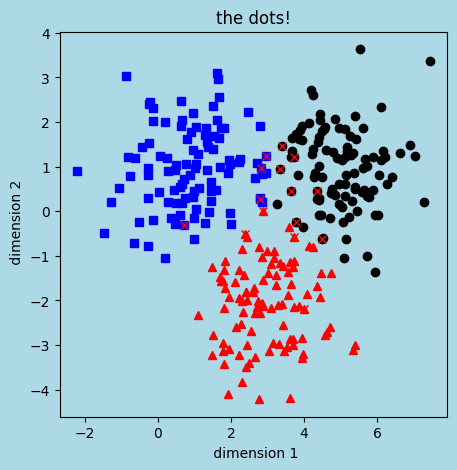

In [ ]:
# show the final predcited plot
fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor('lightblue')
ax.set_facecolor('lightblue')
plt.plot(data[np.where(torch.argmax(predictions,axis=1)==0),0],data[np.where(torch.argmax(predictions,axis=1)==0),1],'bs')
plt.plot(data[np.where(torch.argmax(predictions,axis=1)==1),0],data[np.where(torch.argmax(predictions,axis=1)==1),1],'r^')
plt.plot(data[np.where(torch.argmax(predictions,axis=1)==2),0],data[np.where(torch.argmax(predictions,axis=1)==2),1],'ko')
plt.plot(data[np.where(torch.argmax(predictions,axis=1)!=labels),0],data[np.where(torch.argmax(predictions,axis=1)!=labels),1],'rx')
plt.title('the dots!')
plt.xlabel(' dimension 1')
plt.ylabel(' dimension 2')
plt.show()